In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [ ]:
import sys
import os

# Add the project root to sys.path (adjust the path as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(project_root)

# Now try to import the DataIngestion class
from src.components.data_ingestion import DataIngestion

# Initialize the DataIngestion object
ingestion = DataIngestion()

# Load data from the database
df_traffic = ingestion.load_dataframe('traffic_table')

# Display the data
print(df_traffic.head())

In [2]:
# path1=r"C:\Truck_Delay_Classification\Data\raw_data\training_data\traffic_table_extracted.csv"
# df=pd.read_csv(path1)
# df

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0
...,...,...,...,...,...
2597908,R-38a366a9,2019-02-15,1900,2758.0,0
2597909,R-38a366a9,2019-02-15,2000,1934.0,1
2597910,R-38a366a9,2019-02-15,2100,1699.0,0
2597911,R-38a366a9,2019-02-15,2200,2373.0,0


In [3]:
df.shape

(2597913, 5)

In [4]:
df.info

<bound method DataFrame.info of            route_id        date  hour  no_of_vehicles  accident
0        R-ada2a391  2019-01-01     0           669.0         0
1        R-ada2a391  2019-01-01   100           628.0         0
2        R-ada2a391  2019-01-01   200           516.0         0
3        R-ada2a391  2019-01-01   300           582.0         0
4        R-ada2a391  2019-01-01   400           564.0         0
...             ...         ...   ...             ...       ...
2597908  R-38a366a9  2019-02-15  1900          2758.0         0
2597909  R-38a366a9  2019-02-15  2000          1934.0         1
2597910  R-38a366a9  2019-02-15  2100          1699.0         0
2597911  R-38a366a9  2019-02-15  2200          2373.0         0
2597912  R-38a366a9  2019-02-15  2300          2401.0         0

[2597913 rows x 5 columns]>

In [5]:
df.describe

<bound method NDFrame.describe of            route_id        date  hour  no_of_vehicles  accident
0        R-ada2a391  2019-01-01     0           669.0         0
1        R-ada2a391  2019-01-01   100           628.0         0
2        R-ada2a391  2019-01-01   200           516.0         0
3        R-ada2a391  2019-01-01   300           582.0         0
4        R-ada2a391  2019-01-01   400           564.0         0
...             ...         ...   ...             ...       ...
2597908  R-38a366a9  2019-02-15  1900          2758.0         0
2597909  R-38a366a9  2019-02-15  2000          1934.0         1
2597910  R-38a366a9  2019-02-15  2100          1699.0         0
2597911  R-38a366a9  2019-02-15  2200          2373.0         0
2597912  R-38a366a9  2019-02-15  2300          2401.0         0

[2597913 rows x 5 columns]>

In [6]:
df.head()

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0


In [7]:
#Checking missing or null values
print(df.isnull().sum())

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64


In [8]:
 df['no_of_vehicles'].fillna(df['no_of_vehicles'].mean(), inplace=True)

C:\Users\ritik\AppData\Local\Temp\ipykernel_3612\457734982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_vehicles'].fillna(df['no_of_vehicles'].mean(), inplace=True)


In [9]:
print(df.isnull().sum())

route_id          0
date              0
hour              0
no_of_vehicles    0
accident          0
dtype: int64


Hence used mean to fill the null values

In [10]:
df.duplicated().sum()

np.int64(0)

Hence no duplicate values

In [11]:
#Assessing the columns to remove outliers

df.hour.value_counts()

hour
1200    108261
2200    108257
300     108253
2100    108253
800     108253
1600    108253
1800    108253
1700    108253
1900    108252
2000    108248
2300    108248
0       108247
500     108247
400     108246
600     108246
1500    108245
900     108244
1000    108242
700     108238
200     108237
1400    108236
1300    108236
1100    108234
100     108231
Name: count, dtype: int64

In [12]:
df.hour.value_counts().count()

np.int64(24)

<Axes: ylabel='hour'>

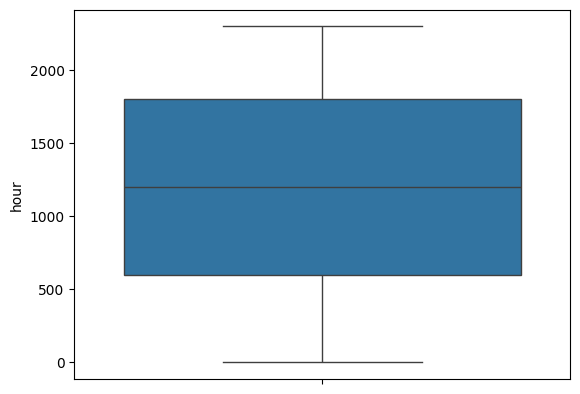

In [13]:
sns.boxplot(y=df['hour'])

Hence there are no outliers to remove here

In [14]:
df.no_of_vehicles.value_counts()

no_of_vehicles
601.0     7205
616.0     6706
598.0     6650
577.0     6532
619.0     6325
          ... 
1646.0       1
3273.0       1
3230.0       1
3213.0       1
1649.0       1
Name: count, Length: 2643, dtype: int64

In [15]:
df.no_of_vehicles.value_counts().count()

np.int64(2643)

<Axes: ylabel='no_of_vehicles'>

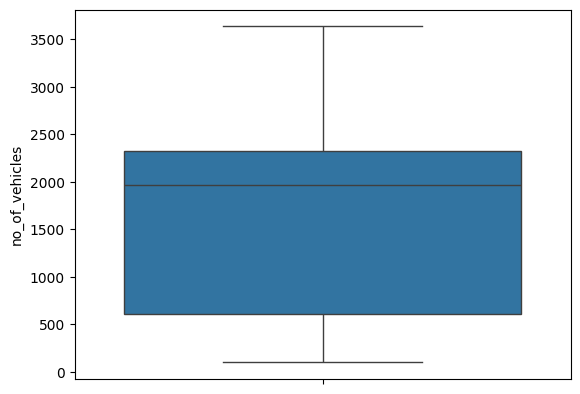

In [16]:
sns.boxplot(y=df['no_of_vehicles'])

Hence no outliers to remove

In [17]:
df.accident.value_counts()

accident
0    2459682
1     138231
Name: count, dtype: int64

In [18]:
df.accident.value_counts().count()

np.int64(2)

In [32]:
df.accident.value_counts()

accident
0    2459682
1     138231
Name: count, dtype: int64

<Axes: ylabel='accident'>

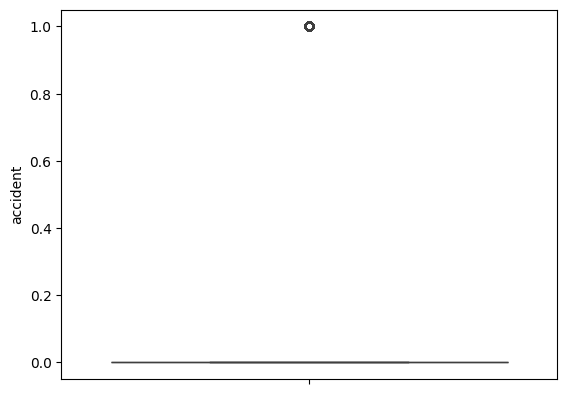

In [19]:
sns.boxplot(y=df['accident'])

In [20]:
#Hence no outliers to remove

In [21]:
df

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0
...,...,...,...,...,...
2597908,R-38a366a9,2019-02-15,1900,2758.0,0
2597909,R-38a366a9,2019-02-15,2000,1934.0,1
2597910,R-38a366a9,2019-02-15,2100,1699.0,0
2597911,R-38a366a9,2019-02-15,2200,2373.0,0


In [23]:
#rename the df
df5 = df

# Adding a new index column with a different name
df5.insert(0, 'RowIndex', range(1, 1 + len(df5)))

# Display the DataFrame with the new index column
print(df5)

         RowIndex    route_id        date  hour  no_of_vehicles  accident
0               1  R-ada2a391  2019-01-01     0           669.0         0
1               2  R-ada2a391  2019-01-01   100           628.0         0
2               3  R-ada2a391  2019-01-01   200           516.0         0
3               4  R-ada2a391  2019-01-01   300           582.0         0
4               5  R-ada2a391  2019-01-01   400           564.0         0
...           ...         ...         ...   ...             ...       ...
2597908   2597909  R-38a366a9  2019-02-15  1900          2758.0         0
2597909   2597910  R-38a366a9  2019-02-15  2000          1934.0         1
2597910   2597911  R-38a366a9  2019-02-15  2100          1699.0         0
2597911   2597912  R-38a366a9  2019-02-15  2200          2373.0         0
2597912   2597913  R-38a366a9  2019-02-15  2300          2401.0         0

[2597913 rows x 6 columns]


In [24]:
df5['event_time']= pd.to_datetime('2024-09-17')

In [26]:
df5

,RowIndex,route_id,date,hour,no_of_vehicles,accident,event_time
0,1,R-ada2a391,2019-01-01,0,669.0,0,2024-09-17
1,2,R-ada2a391,2019-01-01,100,628.0,0,2024-09-17
2,3,R-ada2a391,2019-01-01,200,516.0,0,2024-09-17
3,4,R-ada2a391,2019-01-01,300,582.0,0,2024-09-17
4,5,R-ada2a391,2019-01-01,400,564.0,0,2024-09-17
...,...,...,...,...,...,...,...
2597908,2597909,R-38a366a9,2019-02-15,1900,2758.0,0,2024-09-17
2597909,2597910,R-38a366a9,2019-02-15,2000,1934.0,1,2024-09-17
2597910,2597911,R-38a366a9,2019-02-15,2100,1699.0,0,2024-09-17
2597911,2597912,R-38a366a9,2019-02-15,2200,2373.0,0,2024-09-17


In [27]:
df=df5

In [28]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['hour'].apply(lambda x: f"{x // 100:02}:{x % 100:02}:00")
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['hour'])
df = df.drop(columns=['date', 'hour'])

In [30]:
df5=df
df5

,RowIndex,route_id,no_of_vehicles,accident,event_time,datetime
0,1,R-ada2a391,669.0,0,2024-09-17,2019-01-01 00:00:00
1,2,R-ada2a391,628.0,0,2024-09-17,2019-01-01 01:00:00
2,3,R-ada2a391,516.0,0,2024-09-17,2019-01-01 02:00:00
3,4,R-ada2a391,582.0,0,2024-09-17,2019-01-01 03:00:00
4,5,R-ada2a391,564.0,0,2024-09-17,2019-01-01 04:00:00
...,...,...,...,...,...,...
2597908,2597909,R-38a366a9,2758.0,0,2024-09-17,2019-02-15 19:00:00
2597909,2597910,R-38a366a9,1934.0,1,2024-09-17,2019-02-15 20:00:00
2597910,2597911,R-38a366a9,1699.0,0,2024-09-17,2019-02-15 21:00:00
2597911,2597912,R-38a366a9,2373.0,0,2024-09-17,2019-02-15 22:00:00


In [33]:
!pip install hopsworks


In [34]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043610
2024-09-19 14:36:31,027 WARNING: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead

2024-09-19 14:36:31,027 WARNING: using legacy validation callback
Connected. Call `.close()` to terminate connection gracefully.


In [35]:
traffic_table_fg = fs.get_or_create_feature_group(
    name="traffic_table",
    version=1,
    description="traffic_table",
    online_enabled=True,
    primary_key=['RowIndex'],
    event_time='event_time',
    
)

In [37]:
traffic_table_fg.insert(df5)

2024-09-19 14:38:37,594 WARNING: FeatureGroupWarning: The ingested dataframe contains upper case letters in feature names: `['RowIndex']`. Feature names are sanitized to lower case in the feature store.

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1043610/fs/1035337/fg/1202526


Uploading Dataframe: 0.00% |          | Rows 0/2597913 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: traffic_table_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1043610/jobs/named/traffic_table_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x26f30de4260>, None)

In [31]:
df5.to_csv('df5.csv', index=False)